## K-Means Clustering

**Overview**<br>
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes. After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

My objective is:-
- To categorise the countries using some socio-economic and health factors that determine the overall development of the country. 
- We need to suggest the countries which the CEO needs to focus on the most. 

The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Visualization of data
3. Prepare the data for modelling
4. Hopkins Statistics Test
5. Modelling
6. Final analysis

# 1. Read and understand the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# read the dataset
country = pd.read_csv("Country-data.csv")
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
# 'shape', gives us the total number of rows and columns in the dataframe.
country.shape

(167, 10)

In [4]:
# "info", gives us the total number of non-null entries in each of the columns.
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# describe', gives us a summary of the numerical columns in the dataframe
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# 2. Clean the data

In [6]:
# Calculating the Missing Values % contribution in Dataframe
round(100*(country.isnull().sum())/len(country), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

### Inference:
- None of the columns have null values hence no imputation or drop required.

In [7]:
# Datatype check for the dataframe
country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

### Inference:
- None of the columns have inconsistent datatype, hence no conversion is required.

In [8]:
# Duplicates check
country.loc[country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


### Inference:
- No duplicate values, hence no drop is required.

### Converting imports,exports and health spending from percentage values to actual values of their GDP per capita. Because the percentage values don't give a clear picture of that country. For example Austria and Belarus have almost same exports % (Austria=51.3, Belarus= 51.4) but their gdpp has a huge gap (Austria=46900, Belarus= 6030) which doesn't give an accurate idea of which country is more developed than the other.

In [9]:
# Converting exports,imports and health spending percentages to absolute values.
country['exports'] = country['exports'] * country['gdpp']/100
country['imports'] = country['imports'] * country['gdpp']/100
country['health'] = country['health'] * country['gdpp']/100
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


# 3. Visualization of the data 

### Checking the coorelations between the variables

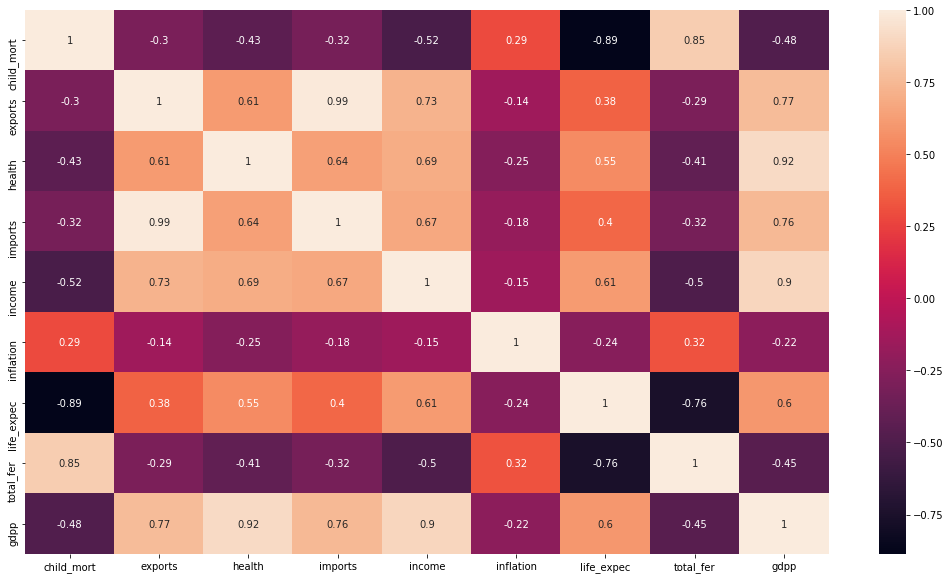

In [10]:
plt.figure(figsize=(18,10))
sns.heatmap(country.corr(), annot= True)
plt.show()

### Inference:
- imports and exports are highly correlated with correlation of 0.99
- health and gdpp are highly correlated with correlation of 0.92
- income and gdpp are highly correlated with correlation of 0.9
- child_mortality and life_expentency are highly correlated with correlation of -0.89
- child_mortality and total_fertility are highly correlated with correlation of 0.85
- gdpp and exports are highly correlated with correlation of 0.77
- gdpp and imports are highly correlated with correlation of 0.76
- life_expentency and total_fertility are highly correlated with correlation of -0.76
- income and exports are highly correlated with correlation of 0.73

## Univariate analysis:-

We need to choose the countries that are in the direst need of aid. Hence, we need to identify those countries with using some socio-economic and health factors that determine the overall development of the country.

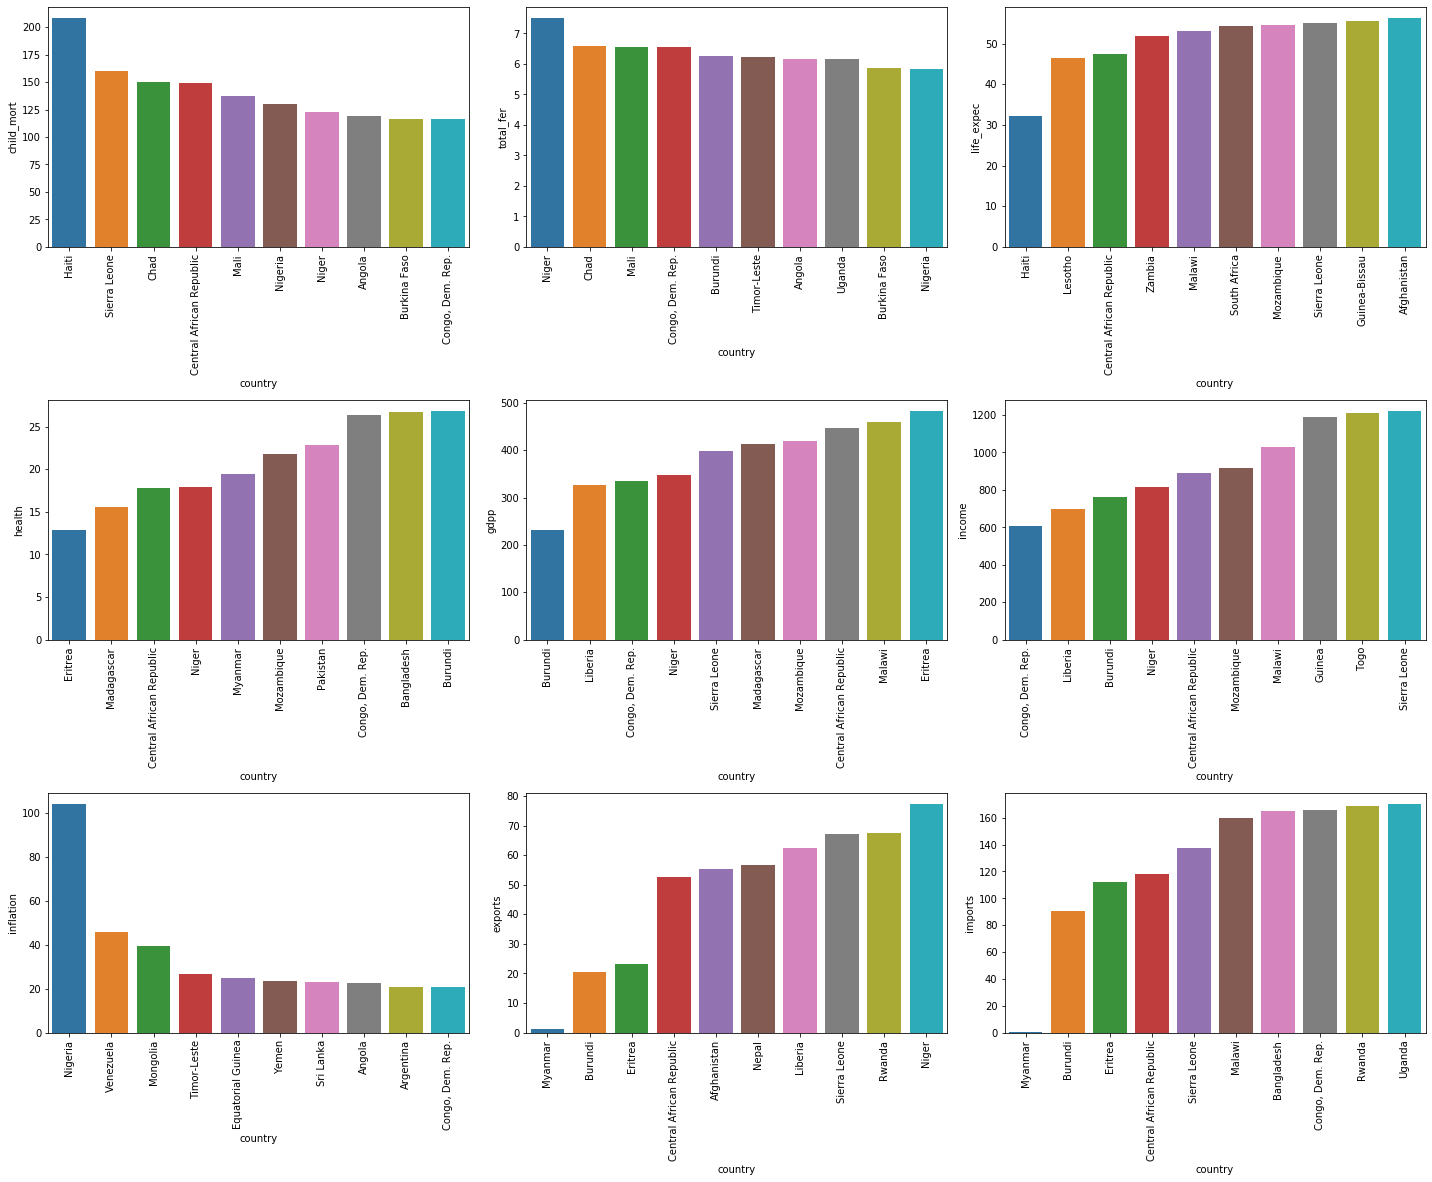

In [11]:
fig= plt.figure(figsize=(20, 20))
# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
plt.subplot(4,3,1)
sns.barplot(x='country', y='child_mort', data=country.sort_values('child_mort', ascending = False).head(10))
plt.xticks(rotation = 90)

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
plt.subplot(4,3,2)
sns.barplot(x='country', y='total_fer', data=country.sort_values('total_fer', ascending = False).head(10))
plt.xticks(rotation = 90)

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
plt.subplot(4,3,3)
sns.barplot(x='country', y='life_expec', data=country.sort_values('life_expec', ascending = True).head(10))
plt.xticks(rotation = 90)
fig.tight_layout()

# Health :Total health spending as %age of Total GDP.
plt.subplot(4,3,4)
sns.barplot(x='country', y='health', data=country.sort_values('health', ascending = True).head(10))
plt.xticks(rotation = 90)

# The GDP per capita : Calculated as the Total GDP divided by the total population.
plt.subplot(4,3,5)
sns.barplot(x='country', y='gdpp', data=country.sort_values('gdpp', ascending = True).head(10))
plt.xticks(rotation = 90)

# Per capita Income : Net income per person
plt.subplot(4,3,6)
sns.barplot(x='country', y='income', data=country.sort_values('income', ascending = True).head(10))
plt.xticks(rotation = 90)
fig.tight_layout()

# Inflation: The measurement of the annual growth rate of the Total GDP
plt.subplot(4,3,7)
sns.barplot(x='country', y='inflation', data=country.sort_values('inflation', ascending = False).head(10))
plt.xticks(rotation = 90)

# Exports: Exports of goods and services. Given as %age of the Total GDP
plt.subplot(4,3,8)
sns.barplot(x='country', y='exports', data=country.sort_values('exports', ascending = True).head(10))
plt.xticks(rotation = 90)

# Imports: Imports of goods and services. Given as %age of the Total GDP
plt.subplot(4,3,9)
sns.barplot(x='country', y='imports', data=country.sort_values('imports', ascending = True).head(10))
plt.xticks(rotation = 90)

plt.show()

### Inference:
- Top 10 sorted countries that are in the direct need of aid, using some socio-economic and health factors that determine the overall development of the country.
- Child mortality rate is highest in Haiti
- Fertility rate is highest in Niger and lowest in Nigeria
- Life expectancy is highest in Afghanistan and lowest in Haiti
- Health situation is worst in Eritrea and highest in Burundi
- GDP per capita is highest in Eritrea
- Sierra Leone has highest per capita income
- Inflation is highest in Nigeria
- Myanmar is lowest in exports and imports


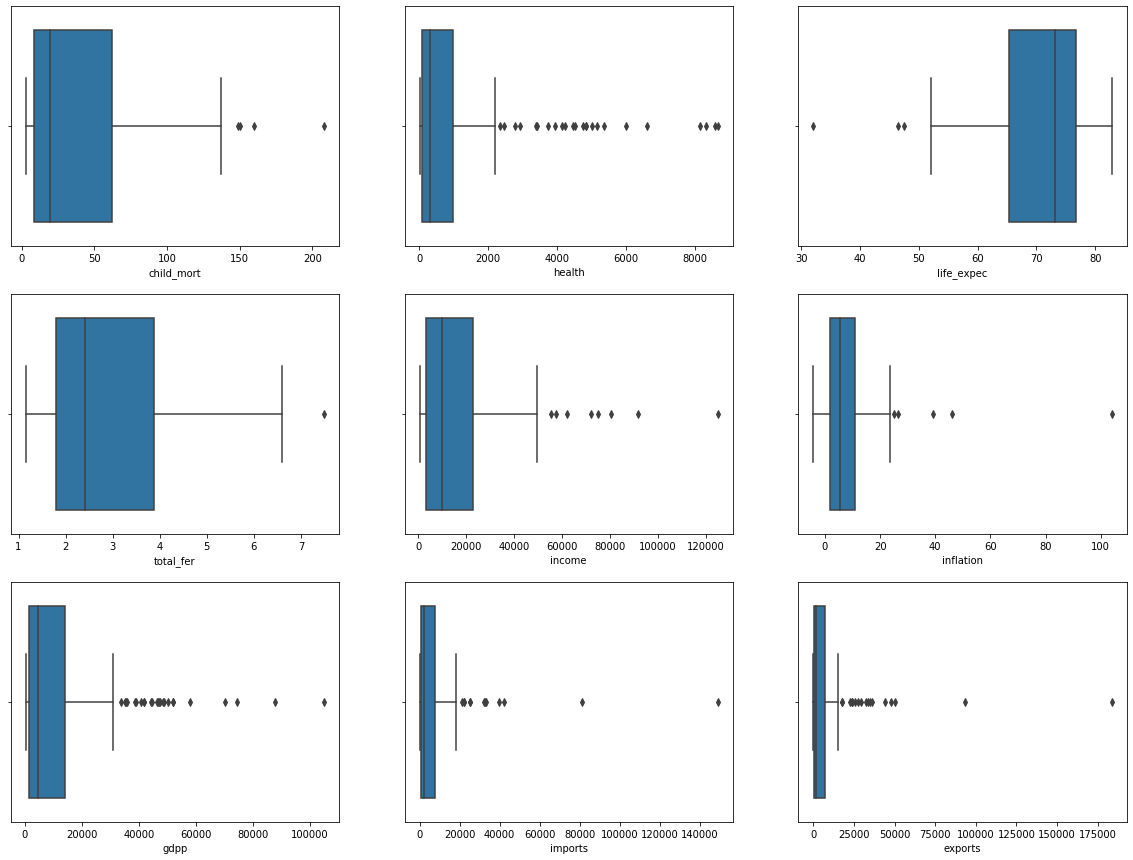

In [12]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(country['child_mort'])
plt.subplot(3,3,2)
sns.boxplot(country['health'])
plt.subplot(3,3,3)
sns.boxplot(country['life_expec'])
plt.subplot(3,3,4)
sns.boxplot(country['total_fer'])
plt.subplot(3,3,5)
sns.boxplot(country['income'])
plt.subplot(3,3,6)
sns.boxplot(country['inflation'])
plt.subplot(3,3,7)
sns.boxplot(country['gdpp'])
plt.subplot(3,3,8)
sns.boxplot(country['imports'])
plt.subplot(3,3,9)
sns.boxplot(country['exports'])
plt.show()

### Inference:
- Outliers are present in each variable.

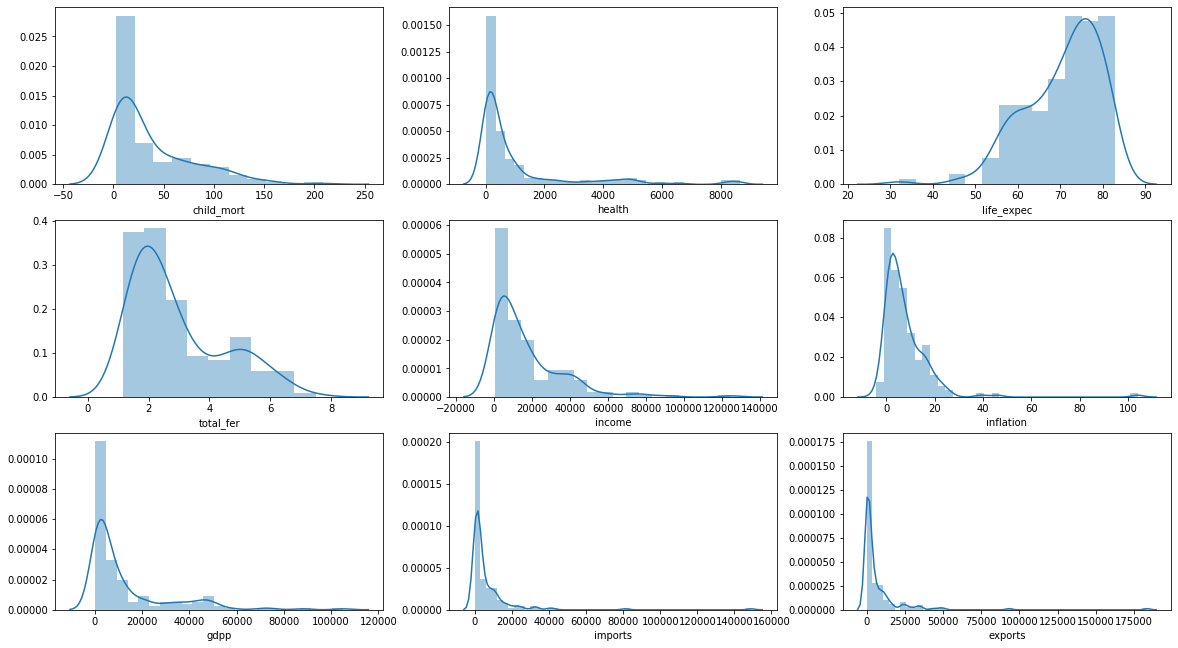

In [13]:
# Histograms
plt.figure(figsize=(20, 15))
plt.subplot(4,3,1)
sns.distplot(country['child_mort'])
plt.subplot(4,3,2)
sns.distplot(country['health'])
plt.subplot(4,3,3)
sns.distplot(country['life_expec'])
plt.subplot(4,3,4)
sns.distplot(country['total_fer'])
plt.subplot(4,3,5)
sns.distplot(country['income'])
plt.subplot(4,3,6)
sns.distplot(country['inflation'])
plt.subplot(4,3,7)
sns.distplot(country['gdpp'])
plt.subplot(4,3,8)
sns.distplot(country['imports'])
plt.subplot(4,3,9)
sns.distplot(country['exports'])
plt.show()

### Inference:
- Distplot showing the distribution of data of each variable.

## Bi-variate analysis (Numerical-Numerical)

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [14]:
num_var=country[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

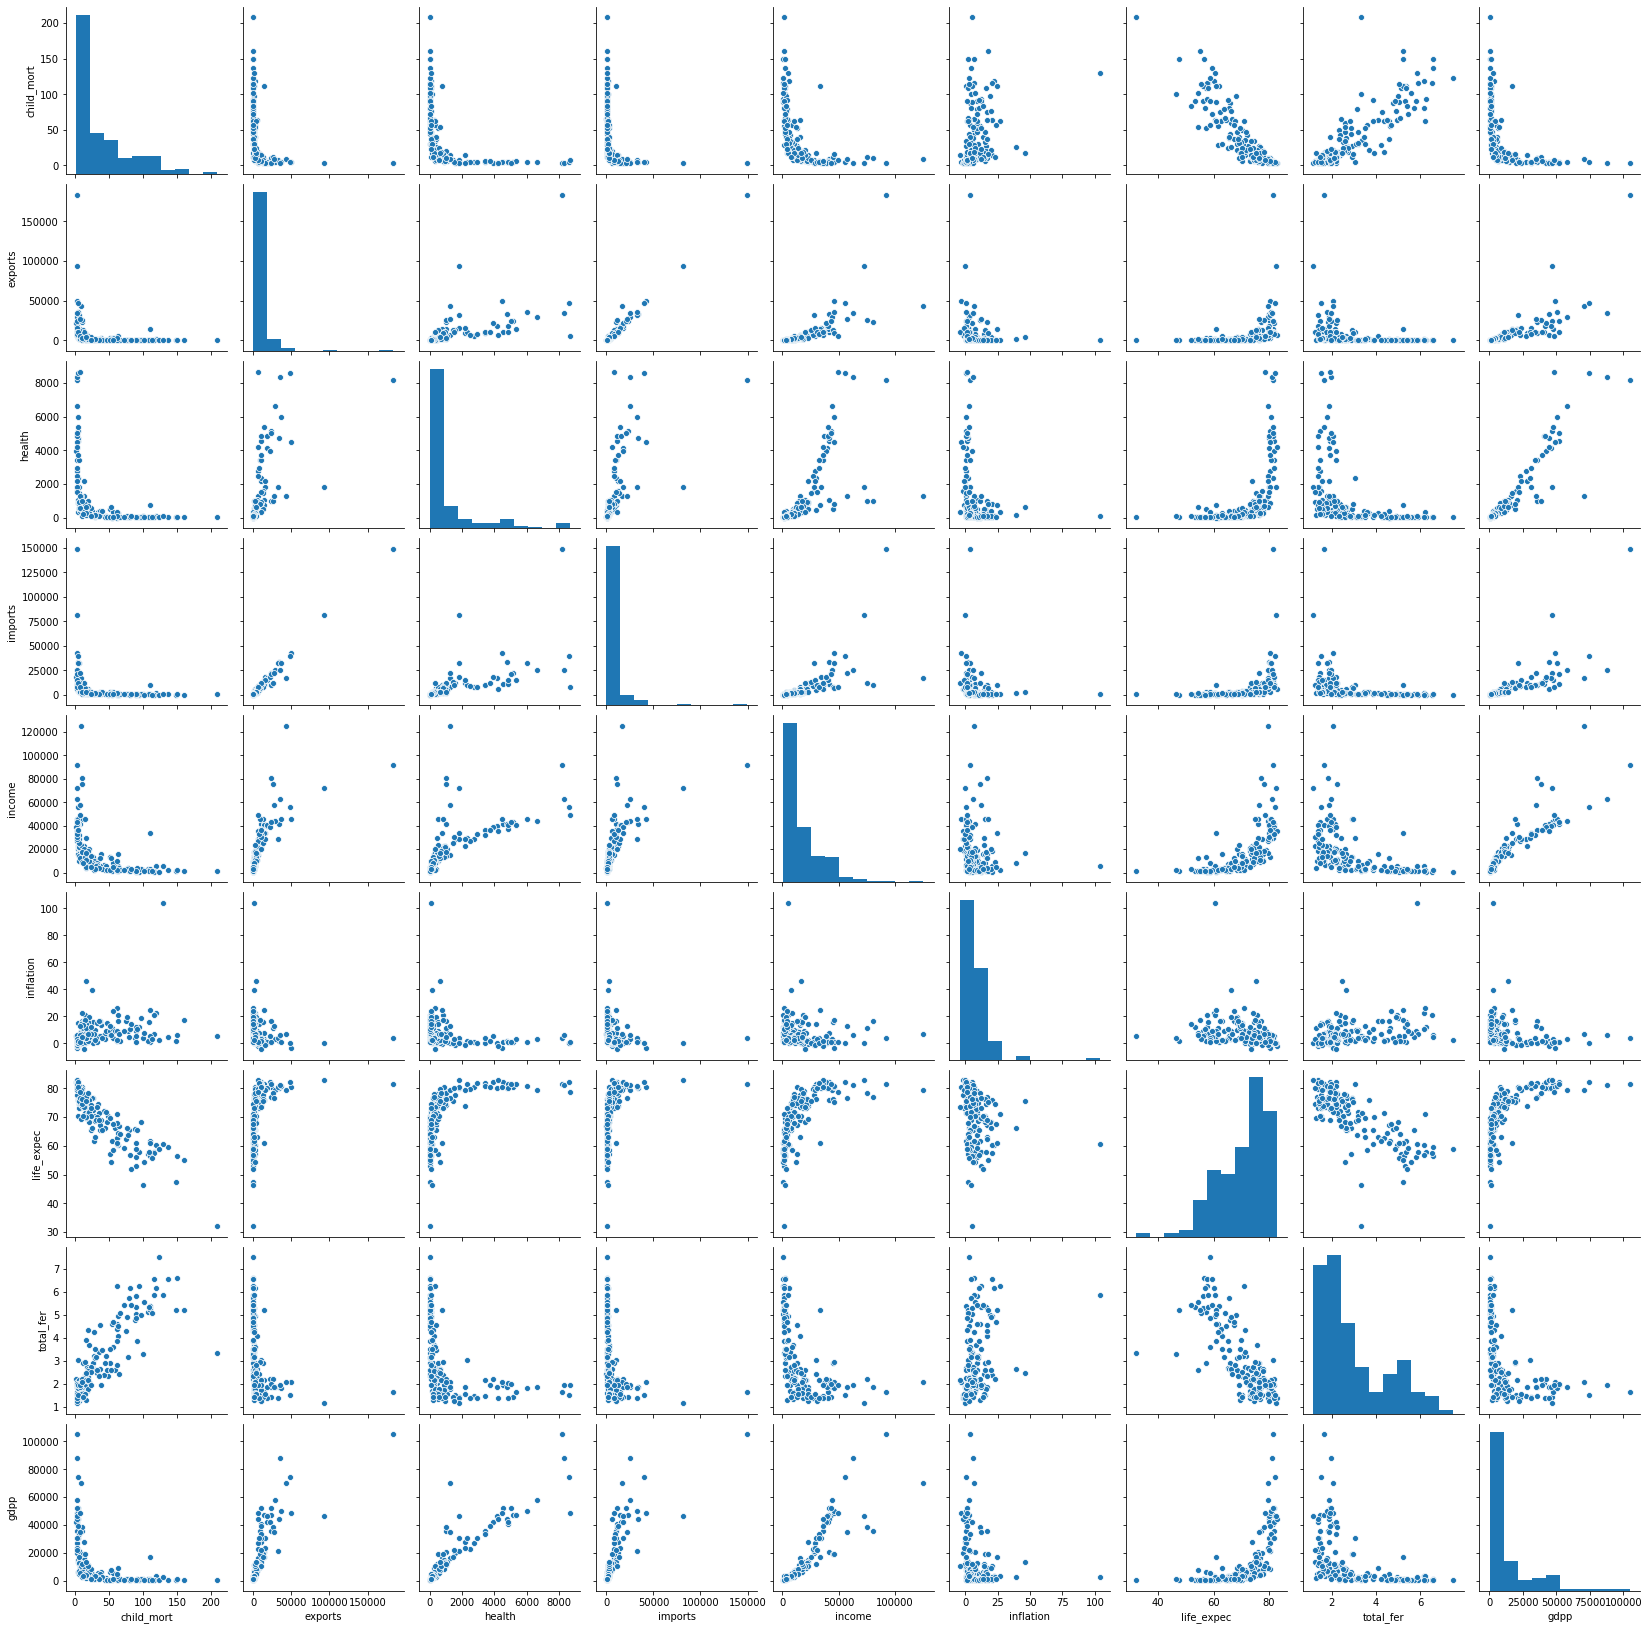

In [15]:
sns.pairplot(num_var)
plt.show()

# 4. Prepare the data for modelling

In [16]:
#Before moving ahead, I will save one copy of orignal data.
country1= country.copy()
country1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


In [17]:
country1.shape

(167, 10)

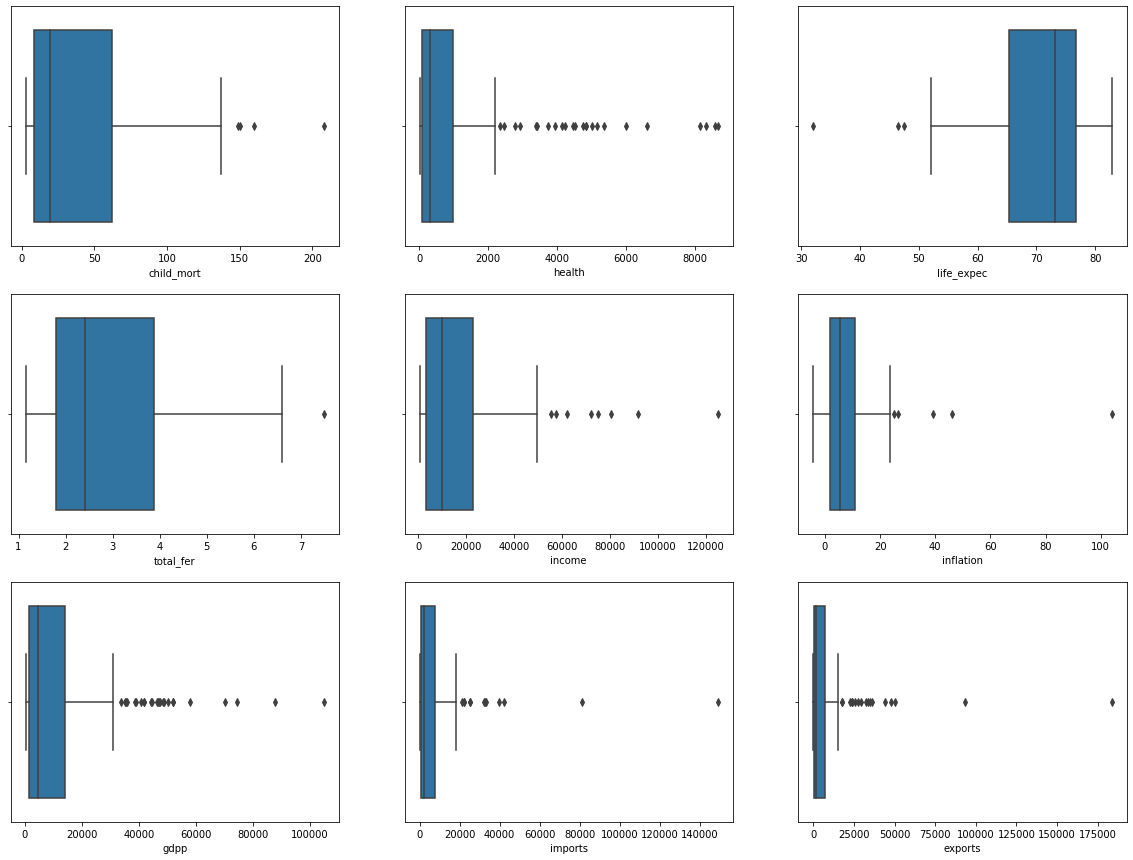

In [18]:
# outlier treatment
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(country1['child_mort'])
plt.subplot(3,3,2)
sns.boxplot(country1['health'])
plt.subplot(3,3,3)
sns.boxplot(country1['life_expec'])
plt.subplot(3,3,4)
sns.boxplot(country1['total_fer'])
plt.subplot(3,3,5)
sns.boxplot(country1['income'])
plt.subplot(3,3,6)
sns.boxplot(country1['inflation'])
plt.subplot(3,3,7)
sns.boxplot(country1['gdpp'])
plt.subplot(3,3,8)
sns.boxplot(country1['imports'])
plt.subplot(3,3,9)
sns.boxplot(country1['exports'])
plt.show()

### Two types of outliers:
 - statistical
 - domain specific

### capping the outliers

In [19]:
# capping (statistical) the outliers

# outlier treatment for child_mort
Q1 = country1.child_mort.quantile(0.01)
Q4 = country1.child_mort.quantile(0.99)
country1['child_mort'][country1['child_mort'] <= Q1]=Q1
country1['child_mort'][country1['child_mort'] >= Q4]=Q4

# outlier treatment for exports
Q1 = country1.exports.quantile(0.01)
Q4 = country1.exports.quantile(0.99)
country1['exports'][country1['exports'] <= Q1]=Q1
country1['exports'][country1['exports'] >= Q4]=Q4

# outlier treatment for health
Q1 = country1.health.quantile(0.01)
Q4 = country1.health.quantile(0.99)
country1['health'][country1['health'] <= Q1]=Q1
country1['health'][country1['health'] >= Q4]=Q4

# outlier treatment for imports
Q1 = country1.imports.quantile(0.01)
Q4 = country1.imports.quantile(0.99)
country1['imports'][country1['imports'] <= Q1]=Q1
country1['imports'][country1['imports'] >= Q4]=Q4

# outlier treatment for income
Q1 = country1.income.quantile(0.01)
Q4 = country1.income.quantile(0.99)
country1['income'][country1['income'] <= Q1]=Q1
country1['income'][country1['income'] >= Q4]=Q4

# outlier treatment for inflation
Q1 = country1.inflation.quantile(0.01)
Q4 = country1.inflation.quantile(0.99)
country1['inflation'][country1['inflation'] <= Q1]=Q1
country1['inflation'][country1['inflation'] >= Q4]=Q4

# outlier treatment for life_expec
Q1 = country1.life_expec.quantile(0.01)
Q4 = country1.life_expec.quantile(0.99)
country1['life_expec'][country1['life_expec'] <= Q1]=Q1
country1['life_expec'][country1['life_expec'] >= Q4]=Q4

# outlier treatment for total_fer
Q1 = country1.total_fer.quantile(0.01)
Q4 = country1.total_fer.quantile(0.99)
country1['total_fer'][country1['total_fer'] <= Q1]=Q1
country1['total_fer'][country1['total_fer'] >= Q4]=Q4

# outlier treatment for gdpp
Q1 = country1.gdpp.quantile(0.01)
Q4 = country1.gdpp.quantile(0.99)
country1['gdpp'][country1['gdpp'] <= Q1]=Q1
country1['gdpp'][country1['gdpp'] >= Q4]=Q4

country1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.440,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.620,63.0,3.50,2970.0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,41.478,75.4,2.47,13500.0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.100,73.1,1.95,1310.0
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,23.600,67.5,4.67,1310.0


In [20]:
country1.shape

(167, 10)

In [21]:
# 2. rescaling
cont_df = country1[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

# instantiate
scaler = StandardScaler()

# fit_transform
country_scaled = scaler.fit_transform(cont_df)
country_scaled.shape

(167, 9)

In [22]:
country_scaled = pd.DataFrame(country_scaled)
country_scaled.columns=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
                         
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


# 5. Hopkins Statistics Test

The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [23]:
# Calculating Hopkins score to know whether the data is good for clustering or not.

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [24]:
# Hopkins score

hopkins(country_scaled)

0.8727122846411209

Inference:
0.87 is a good Hopkins score for Clustering.

# 6. Modelling

## Finding the Optimal Number of Clusters

### SSD / Elbow Curve to get the right number of Clusters
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

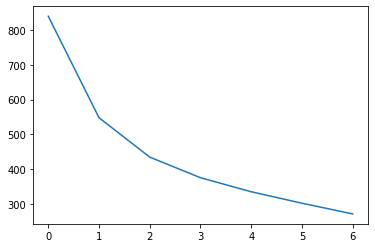

In [25]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [26]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.46939980287788113
For n_clusters=3, the silhouette score is 0.40708993455880516
For n_clusters=4, the silhouette score is 0.39539142309551445
For n_clusters=5, the silhouette score is 0.38611500797464143
For n_clusters=6, the silhouette score is 0.28636340993161424
For n_clusters=7, the silhouette score is 0.2916485283562354
For n_clusters=8, the silhouette score is 0.2855078623647604


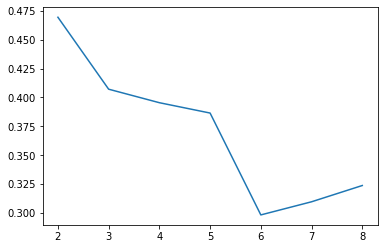

In [27]:
ss = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k).fit(country_scaled)
    ss.append([k, silhouette_score(country_scaled, kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);   

###  I have selected k= 3, based on both the silhouette score and elbow graph as shown above, so the number of clusters will be formed in kmean clustering will be 3

In [28]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state = 100)
kmeans.fit(country_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [29]:
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [30]:
# assign the label
country1['cluster_id1'] = kmeans.labels_
country1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id1
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [31]:
# cross checking
country1.isnull().sum()

country        0
child_mort     0
exports        0
health         0
imports        0
income         0
inflation      0
life_expec     0
total_fer      0
gdpp           0
cluster_id1    0
dtype: int64

In [32]:
country1['cluster_id1'].value_counts()

1    90
2    48
0    29
Name: cluster_id1, dtype: int64

### Inference:
It seems there are good number of countries in each clusters.

In [33]:
country1.groupby('cluster_id1').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id1,,,,,,,,,
0,4.989655,25405.359310,4239.330028,21316.695862,47784.413793,2.906731,80.453103,1.757352,46068.137931
1,20.547778,3477.250726,528.894338,3589.291996,13804.333333,7.131624,73.393333,2.242591,7808.577778
2,90.335417,879.097657,114.939003,827.327888,3901.010000,10.608604,59.567083,4.972233,1911.400833


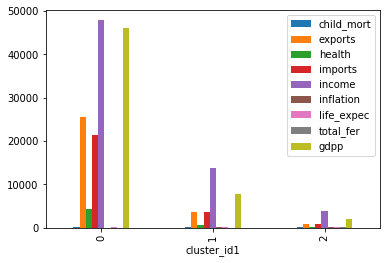

In [34]:
country1.groupby('cluster_id1').mean().plot(kind= 'bar')
plt.show()

## Cluster profiling

### From the business understanding I have learnt that Child_Mortality, Income, Gdpp are some important factors which decides the development of any country.  Hence, we will proceed with cluster profiling by using these 3 variables.
- gdpp: (The GDP per capita) Calculated as the Total GDP divided by the total population. 
- child_mort: Death of children under 5 years of age per 1000 live births.          
- income: Net income per person. 

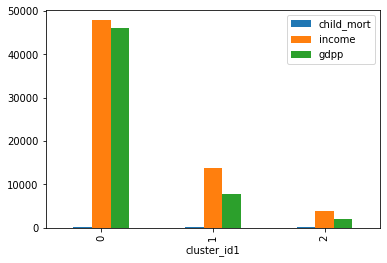

In [35]:
country1[['child_mort', 'income', 'gdpp', 'cluster_id1']].groupby('cluster_id1').mean().plot(kind= 'bar')
plt.show()

### Inference:
Child Mortality is highest for Cluster 2, These clusters need some aid.
Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development. Income per capita and gdpp seems lowest for countries in clusters 2. Hence, these countries need some help.

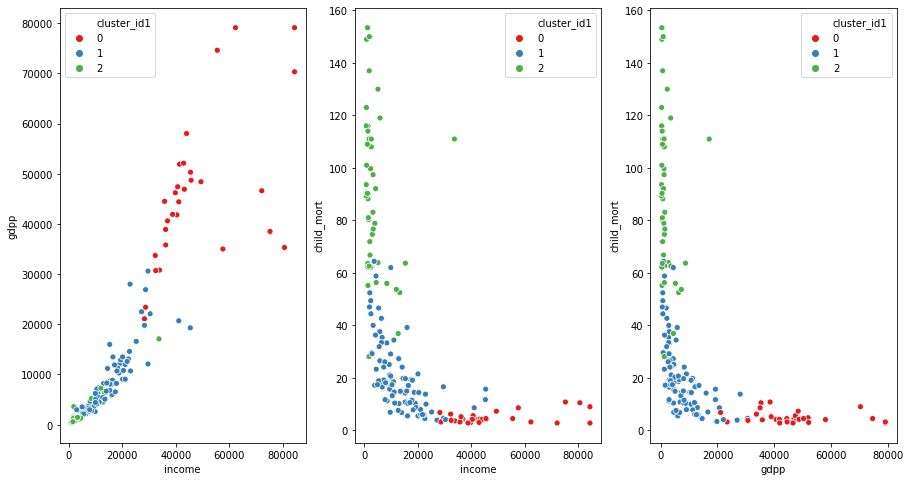

In [36]:
# plotting the cluster ith respect to he clusters obtained
plt.figure(figsize=[15,8])
plt.subplot(1,3,1)
sns.scatterplot(x= 'income', y= 'gdpp', hue='cluster_id1', legend='full', data=country1, palette= 'Set1')
plt.subplot(1,3,2)
sns.scatterplot(x= 'income', y= 'child_mort', hue='cluster_id1', legend='full', data=country1, palette= 'Set1')
plt.subplot(1,3,3)
sns.scatterplot(x= 'gdpp', y= 'child_mort', hue='cluster_id1', legend='full', data=country1, palette= 'Set1')
plt.show()

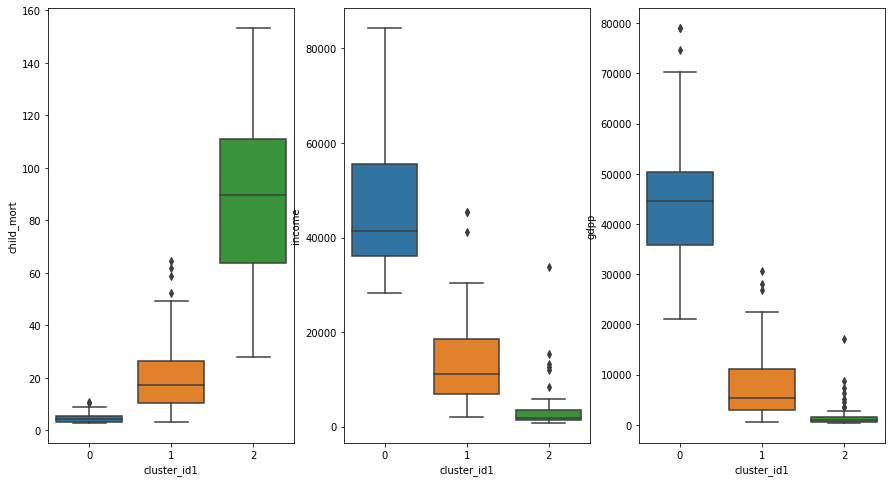

In [37]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_id1', y='child_mort', data=country1)
plt.subplot(1,3,2)
sns.boxplot(x='cluster_id1', y='income', data=country1)
plt.subplot(1,3,3)
sns.boxplot(x='cluster_id1', y='gdpp', data=country1)
plt.show()

### Inference:
Child Mortality is highest for Cluster 2, These clusters need some aid.
Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development. Income per capita and gdpp seems lowest for countries in clusters 2. Hence, these countries need some help.

### Finding the observations that belong to certain cluster

In [38]:
# let's filter the data with selected cluster
kmean_selected_clust=country1[country1.cluster_id1==2]
kmean_selected_clust.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id1
0,Afghanistan,90.2,55.300000,41.9174,248.29700,1610.0,9.440,56.2,5.8200,553.00,2
3,Angola,119.0,2199.190000,100.6050,1514.37000,5900.0,22.400,60.1,6.1600,3530.00,2
17,Benin,111.0,180.404000,31.0780,281.97600,1820.0,0.885,61.8,5.3600,758.00,2
21,Botswana,52.5,2768.600000,527.0500,3257.55000,13300.0,8.920,57.1,2.8800,6350.00,2
25,Burkina Faso,116.0,110.400000,38.7550,170.20000,1430.0,6.810,57.9,5.8700,575.00,2
26,Burundi,93.6,22.243716,26.7960,104.90964,764.0,12.300,57.7,6.2600,331.62,2
28,Cameroon,108.0,290.820000,67.2030,353.70000,2660.0,1.910,57.3,5.1100,1310.00,2
31,Central African Republic,149.0,52.628000,17.7508,118.19000,888.0,2.010,47.5,5.2100,446.00,2
32,Chad,150.0,330.096000,40.6341,390.19500,1930.0,6.390,56.5,6.5636,897.00,2
36,Comoros,88.2,126.885000,34.6819,397.57300,1410.0,3.870,65.9,4.7500,769.00,2


In [39]:
kmean_selected_clust.shape

(48, 11)

In [40]:
select_count=kmean_selected_clust.sort_values(by=['income', 'gdpp', 'child_mort'], ascending=[True, True, False]).head(10)
select_count

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id1
88,Liberia,89.3,62.457000,38.5860,302.80200,742.24,5.47,60.8,5.0200,331.62,2
37,"Congo, Dem. Rep.",116.0,137.274000,26.4194,165.66400,742.24,20.80,57.5,6.5400,334.00,2
26,Burundi,93.6,22.243716,26.7960,104.90964,764.00,12.30,57.7,6.2600,331.62,2
112,Niger,123.0,77.256000,17.9568,170.86800,814.00,2.55,58.8,6.5636,348.00,2
31,Central African Republic,149.0,52.628000,17.7508,118.19000,888.00,2.01,47.5,5.2100,446.00,2
106,Mozambique,101.0,131.985000,21.8299,193.57800,918.00,7.64,54.5,5.5600,419.00,2
94,Malawi,90.5,104.652000,30.2481,160.19100,1030.00,12.10,53.1,5.3100,459.00,2
63,Guinea,109.0,196.344000,31.9464,279.93600,1190.00,16.10,58.0,5.3400,648.00,2
150,Togo,90.3,196.176000,37.3320,279.62400,1210.00,1.18,58.7,4.8700,488.00,2
132,Sierra Leone,153.4,67.032000,52.2690,137.65500,1220.00,17.20,55.0,5.2000,399.00,2


- hence I got these top 10 countries whose child_mort= high, gdpp= low, income=low
- so all these 3 conditions are satisfied with cluster 2 , thats why urgent aid should be provided to the countires of cluster 2 which are :<br>

Liberia<br>
Congo, Dem. Rep.<br>
Burundi<br>
Niger<br>
Central African Republic<br>
Mozambique<br>
Malawi<br>
Guinea<br>
Togo<br>
Sierra Leone<br>

In [41]:
# Lets drop the Cluster Id created with 5 clusters and proceed with Hierarchical Clustering.
country1= country1.drop(['cluster_id1'], axis=1)

## Hierarchical Clustering

In [42]:
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


#### Single Linkage:

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. 

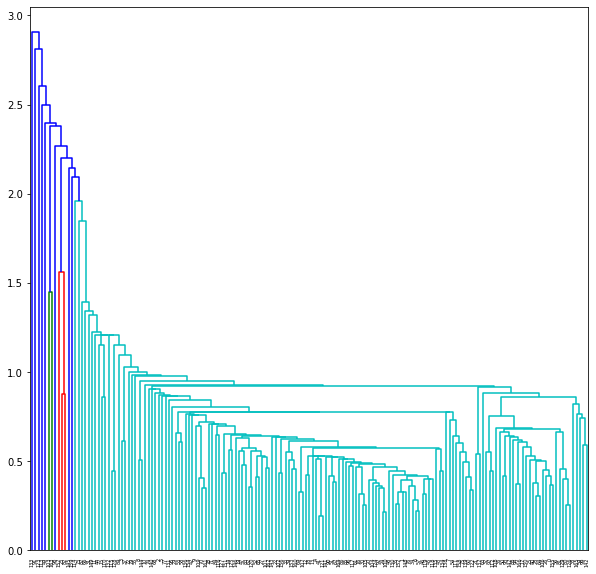

In [43]:
# single linkage
plt.figure(figsize=(10, 10))
mergings = linkage(country_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Complete Linkage

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. 

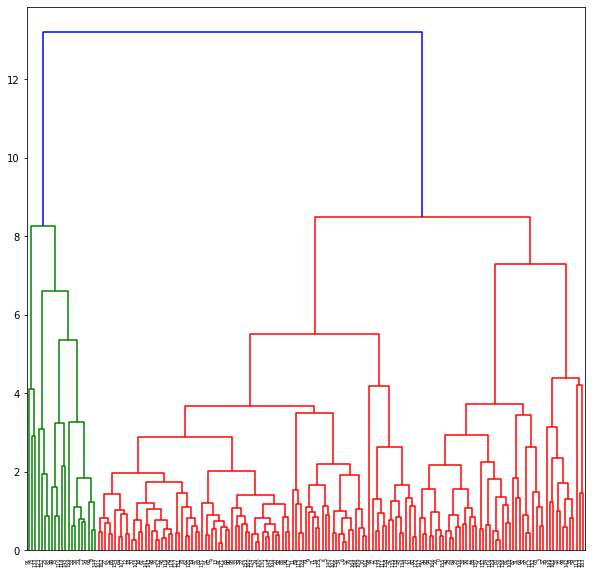

In [44]:
# complete linkage
plt.figure(figsize=(10, 10))
mergings = linkage(country_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### Looking at the dendrogram it is observed that cutting it at n = 4 is most optimum.

In [45]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 3, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0])

In [46]:
# assign cluster labels
country1['cluster_labels1'] = cluster_labels
country1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels1
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [47]:
country1['cluster_labels1'].value_counts()

1    96
0    50
2    18
3     3
Name: cluster_labels1, dtype: int64

### Inference:
It seems there is improper distribution of countries in each clusters.

In [48]:
country1.groupby('cluster_labels1').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_labels1,,,,,,,,,
0,87.586000,945.634750,126.481642,871.805773,4229.169600,11.797820,60.016400,4.875544,2157.944800
1,19.188542,4326.711618,733.089171,4474.111767,15438.333333,5.936460,74.069479,2.181075,9849.187500
2,5.494444,24972.727778,4715.450044,19719.938889,51093.000000,4.129889,80.122222,1.854444,50149.333333
3,3.266667,59916.506667,4826.463333,50956.093333,67391.333333,0.408400,81.356667,1.641067,58129.333333


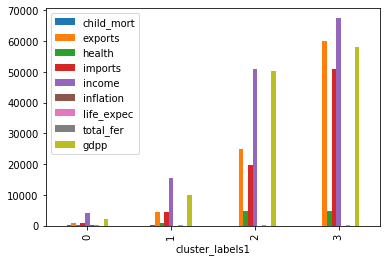

In [49]:
country1.groupby('cluster_labels1').mean().plot(kind= 'bar')
plt.show()

## Cluster profiling

### From the business understanding I have learnt that Child_Mortality, Income, Gdpp are some important factors which decides the development of any country.  Hence, we will proceed with cluster profiling by using these 3 variables.
- gdpp: (The GDP per capita) Calculated as the Total GDP divided by the total population. 
- child_mort: Death of children under 5 years of age per 1000 live births.          
- income: Net income per person. 

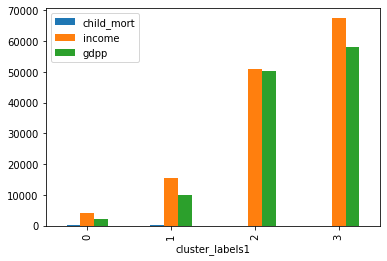

In [50]:
country1[['child_mort', 'income', 'gdpp', 'cluster_labels1']].groupby('cluster_labels1').mean().plot(kind= 'bar')
plt.show()

### Inference:
Child Mortality is highest for Cluster 0. These cluster need some aid.
Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development. Income per capita and gdpp seems lowest for countries in clusters 0. Hence, these countries need some help.

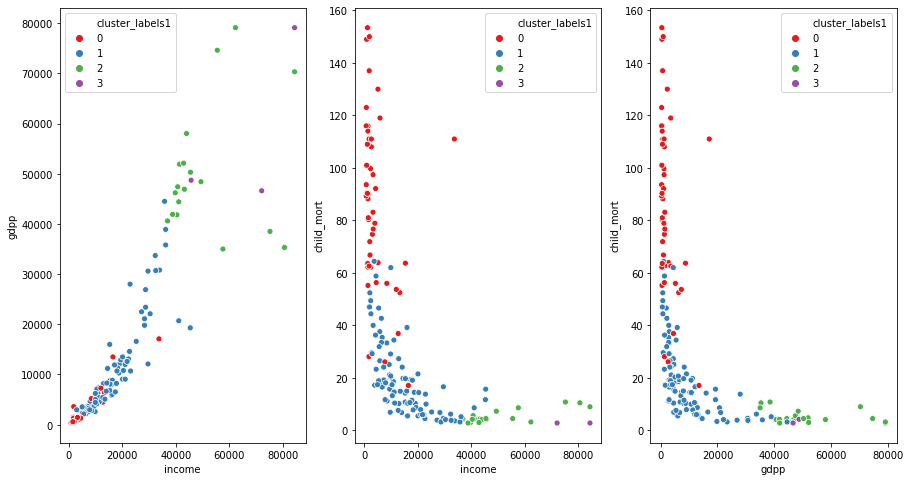

In [51]:
# plotting the cluster ith respect to he clusters obtained
plt.figure(figsize=[15,8])
plt.subplot(1,3,1)
sns.scatterplot(x= 'income', y= 'gdpp', hue='cluster_labels1', legend='full', data=country1, palette= 'Set1')
plt.subplot(1,3,2)
sns.scatterplot(x= 'income', y= 'child_mort', hue='cluster_labels1', legend='full', data=country1, palette= 'Set1')
plt.subplot(1,3,3)
sns.scatterplot(x= 'gdpp', y= 'child_mort', hue='cluster_labels1', legend='full', data=country1, palette= 'Set1')
plt.show()

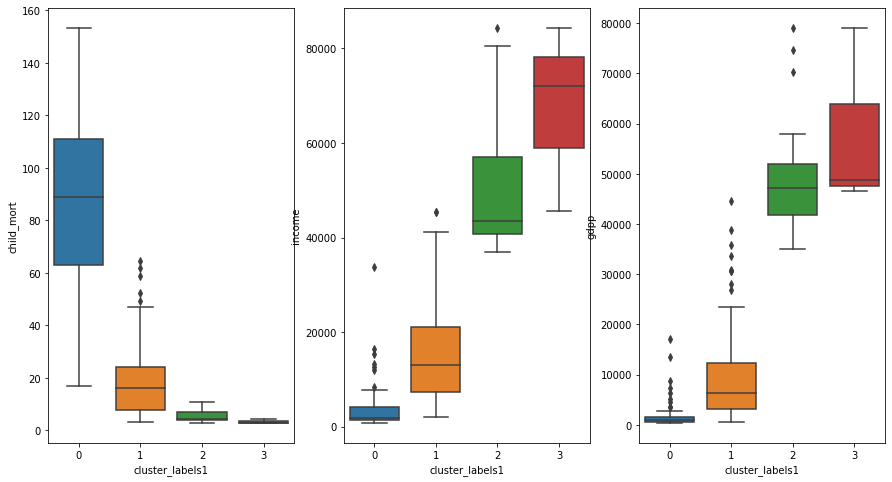

In [52]:
plt.figure(figsize=(15, 8))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_labels1', y='child_mort', data=country1)
plt.subplot(1,3,2)
sns.boxplot(x='cluster_labels1', y='income', data=country1)
plt.subplot(1,3,3)
sns.boxplot(x='cluster_labels1', y='gdpp', data=country1)
plt.show()

### Inference:
Child Mortality is highest for Cluster 0, These clusters need some aid.
Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development. Income per capita and gdpp seems lowest for countries in clusters 0. Hence, these countries need some help.

### Finding the observations that belong to certain cluster

In [53]:
# let's filter the data with selected cluster
hier_clust= country1[country1.cluster_labels1==0]
hier_clust.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels1
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0


In [54]:
hier_clust.shape

(50, 11)

In [55]:
hier_cont= hier_clust.sort_values(by=['income', 'gdpp', 'child_mort'], ascending=[True, True, False]).head(10)
hier_cont

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels1
88,Liberia,89.3,62.457000,38.5860,302.80200,742.24,5.47,60.8,5.0200,331.62,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.4194,165.66400,742.24,20.80,57.5,6.5400,334.00,0
26,Burundi,93.6,22.243716,26.7960,104.90964,764.00,12.30,57.7,6.2600,331.62,0
112,Niger,123.0,77.256000,17.9568,170.86800,814.00,2.55,58.8,6.5636,348.00,0
31,Central African Republic,149.0,52.628000,17.7508,118.19000,888.00,2.01,47.5,5.2100,446.00,0
106,Mozambique,101.0,131.985000,21.8299,193.57800,918.00,7.64,54.5,5.5600,419.00,0
94,Malawi,90.5,104.652000,30.2481,160.19100,1030.00,12.10,53.1,5.3100,459.00,0
63,Guinea,109.0,196.344000,31.9464,279.93600,1190.00,16.10,58.0,5.3400,648.00,0
150,Togo,90.3,196.176000,37.3320,279.62400,1210.00,1.18,58.7,4.8700,488.00,0
132,Sierra Leone,153.4,67.032000,52.2690,137.65500,1220.00,17.20,55.0,5.2000,399.00,0


- hence I got these top 10 countries whose child_mort= high, gdpp= low, income=low
- so all these 3 conditions are satisfied with cluster 0 , thats why urgent aid should be provided to the countires of cluster 0 which are :<br>

Liberia<br>
Congo, Dem. Rep.<br>
Burundi<br>
Niger<br>
Central African Republic<br>
Mozambique<br>
Malawi<br>
Guinea<br>
Togo<br>
Sierra Leone<br>

In [56]:
# Lets drop the Cluster labels created with 3 clusters and proceed with 4 Clusters.
country1= country1.drop(['cluster_labels1'], axis=1)

# 7. Final Analysis

#### I have analyzed both K-means and Hierarchial clustering and found no of clusters formed are not identical but both the clustering method gives the same result i.e same top 10 countries. So, I will proceed with the clusters formed by K-means(as the distribution of countries in each cluster was proper and also in k-mean the selection of k for the cluster formation depends on elbow curve method and silhouette score) and based on the information provided by the final clusters I will deduce the final list of countries which are in need of aid.

In [57]:
# List of countries which need help
select_count

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id1
88,Liberia,89.3,62.457000,38.5860,302.80200,742.24,5.47,60.8,5.0200,331.62,2
37,"Congo, Dem. Rep.",116.0,137.274000,26.4194,165.66400,742.24,20.80,57.5,6.5400,334.00,2
26,Burundi,93.6,22.243716,26.7960,104.90964,764.00,12.30,57.7,6.2600,331.62,2
112,Niger,123.0,77.256000,17.9568,170.86800,814.00,2.55,58.8,6.5636,348.00,2
31,Central African Republic,149.0,52.628000,17.7508,118.19000,888.00,2.01,47.5,5.2100,446.00,2
106,Mozambique,101.0,131.985000,21.8299,193.57800,918.00,7.64,54.5,5.5600,419.00,2
94,Malawi,90.5,104.652000,30.2481,160.19100,1030.00,12.10,53.1,5.3100,459.00,2
63,Guinea,109.0,196.344000,31.9464,279.93600,1190.00,16.10,58.0,5.3400,648.00,2
150,Togo,90.3,196.176000,37.3320,279.62400,1210.00,1.18,58.7,4.8700,488.00,2
132,Sierra Leone,153.4,67.032000,52.2690,137.65500,1220.00,17.20,55.0,5.2000,399.00,2


In [58]:
select_count.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id1
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.0
mean,111.510000,104.804772,30.113440,191.341764,951.848000,9.735000,56.16000,5.587360,420.424000,2.0
std,23.885256,59.664772,10.604117,71.355083,196.851406,6.975459,3.81465,0.630769,98.571605,0.0
min,89.300000,22.243716,17.750800,104.909640,742.240000,1.180000,47.50000,4.870000,331.620000,2.0
25%,91.275000,63.600750,22.977275,143.289000,776.500000,3.280000,54.62500,5.202500,337.500000,2.0
50%,105.000000,90.954000,28.522050,168.266000,903.000000,9.870000,57.60000,5.325000,409.000000,2.0
75%,121.250000,135.951750,35.985600,258.112500,1150.000000,15.150000,58.52500,6.085000,455.750000,2.0
max,153.400000,196.344000,52.269000,302.802000,1220.000000,20.800000,60.80000,6.563600,648.000000,2.0


Final List of countries which are in need of the aid based on socio-economic factors

In [59]:
# Final countries list
select_count.country

88                      Liberia
37             Congo, Dem. Rep.
26                      Burundi
112                       Niger
31     Central African Republic
106                  Mozambique
94                       Malawi
63                       Guinea
150                        Togo
132                Sierra Leone
Name: country, dtype: object

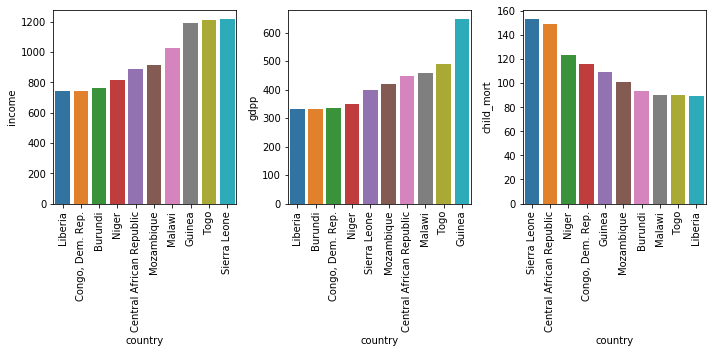

In [60]:
fig= plt.figure(figsize=(10, 5))

plt.subplot(1,3,1)
sns.barplot(x='country', y='income', data=select_count.sort_values('income', ascending = True).head(10))
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.barplot(x='country', y='gdpp', data=select_count.sort_values('gdpp', ascending = True).head(10))
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.barplot(x='country', y='child_mort', data=select_count.sort_values('child_mort', ascending = False).head(10))
plt.xticks(rotation = 90)
fig.tight_layout()
plt.show()

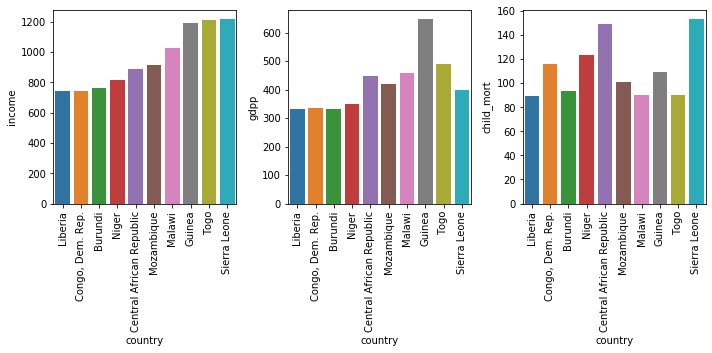

In [61]:
fig= plt.figure(figsize=(10, 5))

plt.subplot(1,3,1)
sns.barplot(x='country', y='income', data=select_count)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.barplot(x='country', y='gdpp', data=select_count)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.barplot(x='country', y='child_mort', data=select_count)
plt.xticks(rotation = 90)

fig.tight_layout()
plt.show()

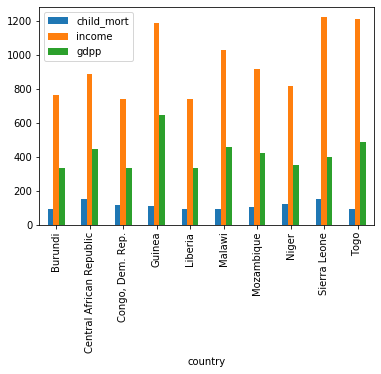

In [62]:
select_count[['child_mort', 'income', 'gdpp', 'country']].groupby('country').mean().plot(kind= 'bar')

### Closing Statement:
- I have identified few factors like child mortality, income, gdpp plays a vital role in deciding the development status of the country and done profiling of clusters based on that. Based on my final selected cluster I have identified the below list of countries which are in direct need of aid. The list of countries are subject to change as it is based on the few factors like Number of components chosen, Number of Clusters chosen, Clustering method used, sorting of variables etc. which I have used to build the model.

Final List of countries which are in need of the aid based on socio-economic factors

In [63]:
# Final countries list
select_count.reset_index(drop=True).country

0                     Liberia
1            Congo, Dem. Rep.
2                     Burundi
3                       Niger
4    Central African Republic
5                  Mozambique
6                      Malawi
7                      Guinea
8                        Togo
9                Sierra Leone
Name: country, dtype: object